# Detection of Tooth Grinding

## Description:
This project aims to develop a biofeedback system for the detection and classification of tooth grinding. The system consists of a MCU (to be specific the Arduino Leonardo), a sensor unit and an actuator unit. 

This Jupyter Notebook is used to train a classifier, which will then be exported into a readable C file for the Arduino.  [source: https://eloquentarduino.github.io/2019/11/you-can-run-machine-learning-on-arduino/]

In [1]:
# make standard imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.signal as sig

from micromlgen import port     # Generate C code for microcontrollers from Python's sklearn classifiers.
from sklearn.svm import SVC     # C-Support Vector Classification

In [2]:
# Load data
filepath   = os.getcwd() + "/data/emg_r_angespannt.csv"
emg_ref_angespannt_df = pd.read_excel(os.getcwd() + "/data/emg_angespannt2.xlsx")
emg_ref_entspannt_df = pd.read_excel(os.getcwd() + "/data/emg_entspannt2.xlsx")

emg_ref_angespannt_df = emg_ref_angespannt_df.loc[emg_ref_angespannt_df.emg_val != "'"].astype('float')
emg_ref_entspannt_df = emg_ref_entspannt_df.loc[emg_ref_entspannt_df.emg_val != "'"].astype('float')

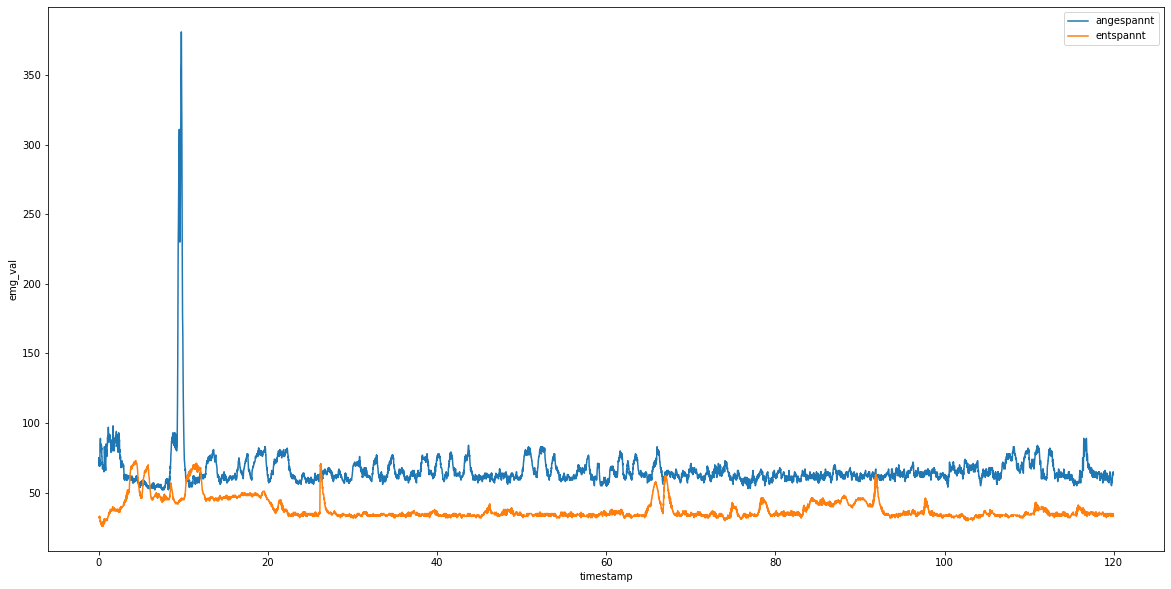

In [3]:
fig = plt.figure(figsize=(20,10))
sns.lineplot(x = emg_ref_angespannt_df.timestamp-emg_ref_angespannt_df.timestamp.iloc[0], y=emg_ref_angespannt_df.emg_val, label="angespannt")
sns.lineplot(x=emg_ref_entspannt_df.timestamp-emg_ref_entspannt_df.timestamp.iloc[0], y=emg_ref_entspannt_df.emg_val, label="entspannt")

In [4]:
MAP = {0: 'ENTSPANNT', 
       1: 'ANGESPANNT'}

def map_values(x, in_min, in_max, out_min, out_max):
    return (x - in_min) * (out_max - out_min) / (in_max - in_min) + out_min

angespannt_df = emg_ref_angespannt_df.copy()
angespannt_df['emg_in_v'] =  [map_values(x, 0, 1023, 0, 5) for x in angespannt_df.emg_val]
angespannt_df['class'] = 1
angespannt_df.drop(columns=angespannt_df.columns[0], inplace=True)

entspannt_df = emg_ref_entspannt_df.copy()
entspannt_df['emg_in_v'] =  [map_values(x, 0, 1023, 0, 5) for x in entspannt_df.emg_val]
entspannt_df['class'] = 0
entspannt_df.drop(columns=entspannt_df.columns[0], inplace=True)
display(angespannt_df.describe())
display(entspannt_df.describe())

#fig = plt.figure(figsize=(20,10))
#sns.lineplot(x = angespannt_df.timestamp-angespannt_df.timestamp.iloc[0], y=angespannt_df.emg_in_v, label="angespannt")


,timestamp,emg_val,emg_in_v,class
count,6.449000e+03,6449.000000,6449.000000,6449.0
mean,1.581633e+09,66.035820,0.322756,1.0
std,3.448834e+01,16.675772,0.081504,0.0
min,1.581633e+09,52.000000,0.254154,1.0
25%,1.581633e+09,61.000000,0.298143,1.0
50%,1.581633e+09,63.000000,0.307918,1.0
75%,1.581633e+09,68.000000,0.332356,1.0
max,1.581633e+09,381.000000,1.862170,1.0


,timestamp,emg_val,emg_in_v,class
count,5.384000e+03,5384.000000,5384.000000,5384.0
mean,1.581633e+09,38.449851,0.187927,0.0
std,3.414820e+01,7.734644,0.037804,0.0
min,1.581633e+09,26.000000,0.127077,0.0
25%,1.581633e+09,34.000000,0.166178,0.0
50%,1.581633e+09,35.000000,0.171065,0.0
75%,1.581633e+09,42.000000,0.205279,0.0
max,1.581633e+09,73.000000,0.356794,0.0


##  Feature Extraction
Extract EMG features to reduce noises and improve overall classification performance.[1]

In [5]:
# common features in the time domain [2]


## Classifier

To do: 
- train
- evaluate
- export for Arduino

In [6]:
# create classifier
X_train = []
y_train = []
svm_clf = SVC()
svm_clf.fit(X, y)

NameError: name 'X' is not defined

In [ ]:
# create c code of the classifier 
c_code = port(svm_clf)

# save c_code in 'model.h'
f = open("model.h", "w")
f.write(c_code)
f.close()

# in Arduino project #include 'model.h' use functions below to perform prediction 

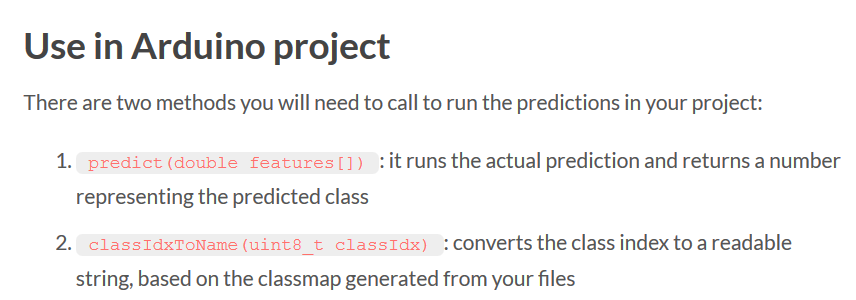

### References: 

[1] Chowdhury, R.H.; Reaz, M.B.I.; Ali, M.A.B.M.; Bakar, A.A.A.; Chellappan, K.; Chang, T.G. Surface Electromyography Signal Processing and Classification Techniques. Sensors 2013, 13, 12431-12466.   
[2] Toledo Pérez, Diana & Rodriguez, Juvenal & Gómez Loenzo, Roberto & Jauregui, Juan. (2019). Support Vector Machine-Based EMG Signal Classification Techniques: A Review. Applied Sciences. 9. 4402. 10.3390/app9204402. 